# CAPM Tutorial

CAPM stands for *capital asset pricing model*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

We begin by loading the data. The dataframe looks like this:

In [3]:
comp_df = pd.read_csv("ING.csv")
indx_df = pd.read_csv("^AEX.csv")

comp_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-27,18.190001,18.270000,18.139999,18.150000,15.966038,1769200
1,2017-11-28,18.100000,18.280001,18.020000,18.260000,16.062803,2814000
2,2017-11-29,18.250000,18.290001,18.139999,18.219999,16.027617,4953600
3,2017-11-30,18.230000,18.240000,18.080000,18.100000,15.922054,3257000
4,2017-12-01,18.049999,18.070000,17.820000,17.980000,15.816492,4792100
5,2017-12-04,18.100000,18.160000,18.020000,18.090000,15.913258,3718400
6,2017-12-05,17.950001,18.020000,17.860001,17.870001,15.719730,3975000
7,2017-12-06,17.770000,17.820000,17.700001,17.719999,15.587779,3063300
8,2017-12-07,17.910000,18.180000,17.870001,18.129999,15.948444,2176500
9,2017-12-08,18.510000,18.559999,18.320000,18.549999,16.317905,9069100


We choose the 'High' column to do our calculations

In [4]:
setting = 'High'
comp = comp_df[setting]
indx = indx_df[setting]

comp.head(5)

0    18.270000
1    18.280001
2    18.290001
3    18.240000
4    18.070000
Name: High, dtype: float64

ING Stock and the AEX Index can be seen in the plots below. The effect of the attack can be observed aswell. Attack happened in the 42nd timestep.

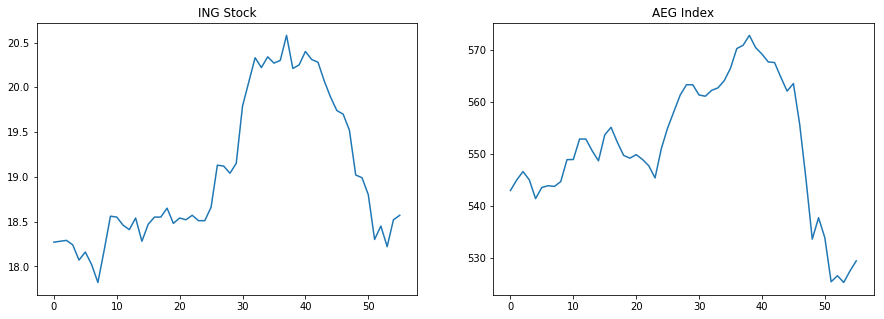

In [5]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))

ax[0].plot(comp)
ax[0].title.set_text('ING Stock')
ax[1].plot(indx)
ax[1].title.set_text('AEG Index')
plt.show()

We calculate the percentage of change by day for ING stock and AEX index.

In [6]:
comp_diff, indx_diff = [((series-series.shift(1)) / series.shift(1)).dropna() for series in [comp, indx]]
comp_diff.head()

1    0.000547
2    0.000547
3   -0.002734
4   -0.009320
5    0.004981
Name: High, dtype: float64

How percentage of change differs before and after the attack can be observed in the plot below.

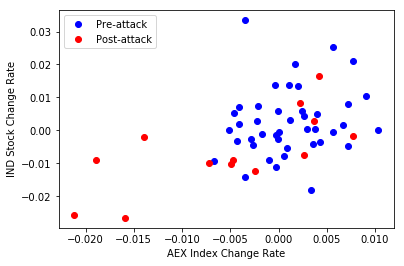

In [11]:
divide_from = 42

plt.plot(indx_diff[:divide_from], comp_diff[:divide_from], 'bo', label='Pre-attack')
plt.plot(indx_diff[divide_from:], comp_diff[divide_from:], 'ro', label='Post-attack')
plt.legend()
plt.ylabel('IND Stock Change Rate')
plt.xlabel('AEX Index Change Rate')
plt.show()

In the next step, we fit a regression model on the points before the attack:

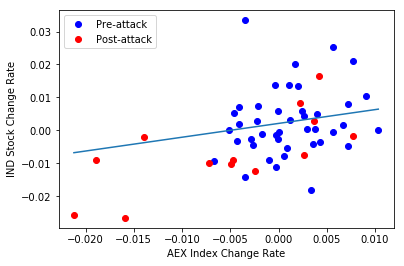

In [8]:
plt.plot(indx_diff[:divide_from], comp_diff[:divide_from], 'bo', label='Pre-attack')
plt.plot(indx_diff[divide_from:], comp_diff[divide_from:], 'ro', label='Post-attack')
plt.legend()
plt.ylabel('IND Stock Change Rate')
plt.xlabel('AEX Index Change Rate')

p = np.polyfit(indx_diff[:divide_from], comp_diff[:divide_from], deg = 1)
line = lambda x: p[0] * x + p[1]
boundaries = [indx_diff.min(), indx_diff.max()]
plt.plot(boundaries, [line(i) for i in boundaries])
plt.show()

You can see how actual and predicted changes are different:

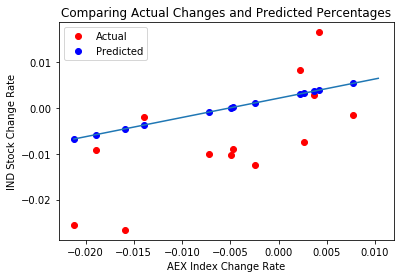

In [9]:
predicted = [line(i) for i in indx_diff[divide_from:]]

plt.title("Comparing Actual Changes and Predicted Percentages")
plt.plot(indx_diff[divide_from:], comp_diff[divide_from:], 'ro', label='Actual')
plt.plot(indx_diff[divide_from:], predicted, 'bo', label='Predicted')
plt.legend()
plt.ylabel('IND Stock Change Rate')
plt.xlabel('AEX Index Change Rate')

plt.plot(boundaries, [line(i) for i in boundaries])
plt.show()

Using the predicted values, we can predict a ING stock price based on the fitted regression model:

In [10]:
final_number = comp[divide_from]

for i in predicted:
    final_number += final_number * i

print("Predicted: %.2f" % final_number)
print("Actual:    %f" % comp.values[-1])

Predicted: 20.24
Actual:    18.570000


You can see that the ING stock price is damaged from the attack accroding to the model.